In [1]:
# Import our libraries we are going to use for our data analysis.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:
file_path = '/Users/Suha/Insight/coding_challenge/test_challenge/ingestion/lending_club/loan.csv'
loan = pd.read_csv(file_path, low_memory=False)

In [4]:
# if we loose the working dataframe, no need to reload the data
df = loan 
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


# Descriptive statistics

We will work with a small set of data to illustrate how we can choose columns and perform data cleaning and extraction tasks

In [106]:
req_cols = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'zip_code',
       'addr_state', 'dti', 'grade']

df_to_clean = df[req_cols]
df_to_clean.shape[0]

2260668

In [100]:
df_to_clean.isnull().sum()

loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
emp_length             146907
home_ownership              0
annual_inc                  4
verification_status         0
issue_d                     0
purpose                     0
zip_code                    1
addr_state                  0
dti                      1711
grade                       0
dtype: int64

## Cleaning up employee length column
About 6% of the data is missing in employee_length column, ideally we would like to drop it. But it can be a powerful predictor, when grouped with other columns. So, for illustration purposes we will keep it. We will replace the null value with 0 and replace it with numbers


In [101]:
emp_length = df_to_clean["emp_length"].str.replace('+' , '').str.replace('years' , '').str.replace('year', '').str.replace('< 1' , '0')
emp_length = pd.to_numeric(emp_length).fillna(0)
df_to_clean = df_to_clean.drop("emp_length" , axis = 1)
df_to_clean= df_to_clean.merge(emp_length, left_index=True, right_index=True )

In [102]:
df_to_clean.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,purpose,zip_code,addr_state,dti,grade,emp_length
0,2500,2500,2500.0,36 months,13.56,84.92,RENT,55000.0,Not Verified,Dec-2018,debt_consolidation,109xx,NY,18.24,C,10.0
1,30000,30000,30000.0,60 months,18.94,777.23,MORTGAGE,90000.0,Source Verified,Dec-2018,debt_consolidation,713xx,LA,26.52,D,10.0
2,5000,5000,5000.0,36 months,17.97,180.69,MORTGAGE,59280.0,Source Verified,Dec-2018,debt_consolidation,490xx,MI,10.51,D,6.0
3,4000,4000,4000.0,36 months,18.94,146.51,MORTGAGE,92000.0,Source Verified,Dec-2018,debt_consolidation,985xx,WA,16.74,D,10.0
4,30000,30000,30000.0,60 months,16.14,731.78,MORTGAGE,57250.0,Not Verified,Dec-2018,debt_consolidation,212xx,MD,26.35,C,10.0


## Cleaning dti column

In [107]:
df_to_clean['dti'].value_counts(dropna = False).head(2)

0.0    1732
NaN    1711
Name: dti, dtype: int64

We notice that there are nan values, lets take care of them first

In [110]:
dti = pd.to_numeric(df_to_clean['dti'])
dti = dti.fillna(0)
df_to_clean = df_to_clean.drop("dti" , axis = 1)
df_to_clean= df_to_clean.merge(dti, left_index=True, right_index=True )


In [111]:
df_to_clean['dti'].describe()

count    2.260668e+06
mean     1.880995e+01
std      1.418741e+01
min     -1.000000e+00
25%      1.188000e+01
50%      1.783000e+01
75%      2.448000e+01
max      9.990000e+02
Name: dti, dtype: float64

we notice negative values, which seems unlikely as the minimum possible value should not be less than 0. lets create a histogram and have a closer look

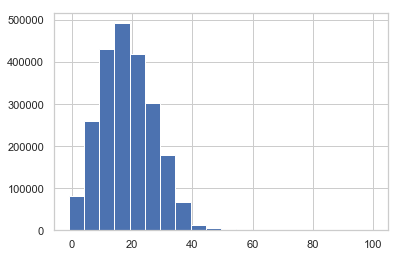

In [132]:
# create a figure object
fig, ax = plt.subplots()

#generate the histogram specifying the range
ax.hist(df_to_clean['dti'] ,bins = 20, range = (-1,100))
plt.savefig("dti_all.png")
plt.show()

To get a better idea of distribution let us look at the different ranges.

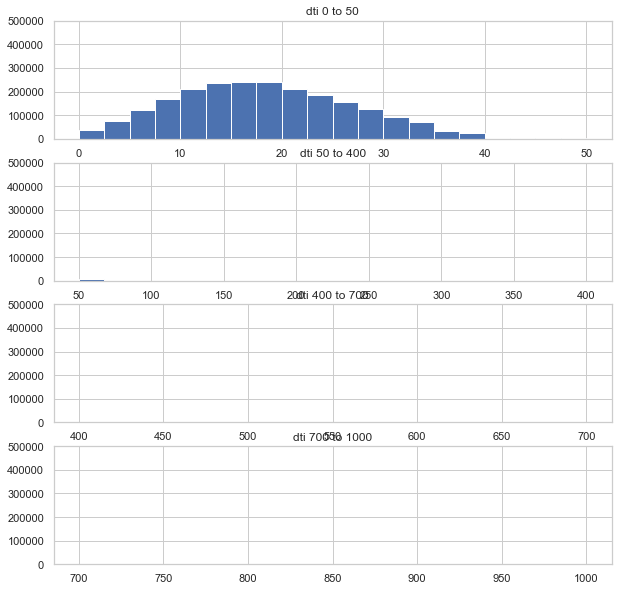

In [133]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.hist(df_to_clean['dti'] ,bins = 20, range = (0,50))
ax1.set_title('dti 0 to 50')
ax1.set_ylim(0,500000)

ax2.hist(df_to_clean['dti'] ,bins = 20, range = (50,400))
ax2.set_title('dti 50 to 400')
ax2.set_ylim(0,500000)

ax3.hist(df_to_clean['dti'] ,bins = 20, range = (400,700))
ax3.set_title('dti 400 to 700')
ax3.set_ylim(0,500000)

ax4.hist(df_to_clean['dti'] ,bins = 20, range = (700,1000))
ax4.set_title('dti 700 to 1000')
ax4.set_ylim(0,500000)

plt.savefig("dti_bins.png")
plt.show()

We see that we there are negligible value above 60, so we will impute median for all the value above 60 and below zero for our analysis. This way we will reduce the outliers in the dateset.

In [116]:
def clean_dti(row ):
    if row < 0:
        return df_to_clean['dti'].mean()
    elif row < 60:
        return row
    else:
        return df_to_clean['dti'].mean()
    
dti = df_to_clean['dti'].apply(clean_dti)
df_to_clean = df_to_clean.drop("dti" , axis = 1)
df_to_clean= df_to_clean.merge(dti, left_index=True, right_index=True )


In [117]:
df_to_clean['dti'].describe()

count    2.260668e+06
mean     1.841664e+01
std      8.859430e+00
min      0.000000e+00
25%      1.188000e+01
50%      1.783000e+01
75%      2.437000e+01
max      5.998000e+01
Name: dti, dtype: float64

## Calculating correlation

Now lets go ahead and check the correlation amongst the variables. The correlation is provided only for the numeric variables. 

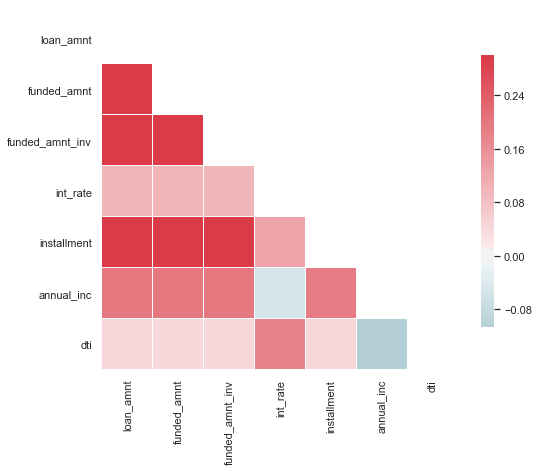

In [134]:
corr = df_to_clean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig("corr.png")
plt.show()

The four columns loan_amnt, funded_amnt , funded_amnt_inv and installment are highly correlated. We should keep only one of them in our dataset.